
# Climatology Average

In this example we'll demonstrate using geocat-comp's [`climatology_average`](https://geocat-comp.readthedocs.io/en/latest/user_api/generated/geocat.comp.climatologies.climatology_average.html#geocat.comp.climatologies.climatology_average) function to compute daily and monthly climatologies of raw surface temperature data from a 6-hour temporal resolution model.

In [1]:
import cftime
import matplotlib.pyplot as plt
import xarray as xr

from geocat.comp import climatology_average
import geocat.datafiles as gdf

## Read in data

We will get the data from the [geocat-datafiles](https://github.com/NCAR/geocat-datafiles) package. This package contains example data used in many of the examples for geocat packages.

Then, we use xarray's [open_dataset](http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html) function to read the data into an xarray dataset, choose a single model from the ensemble run, and extract its surface temperature data into `temp`.

In [2]:
ds = xr.open_dataset(gdf.get('netcdf_files/atm.20C.hourly6-1990-1995-TS.nc'))
ds = ds.isel(member_id=0)  # select one model from the ensemble

temp = ds.TS  # surface temperature data

## Look at the Raw Data

Before we compute the climatologies, let's take a look at the raw surface temperature data from our selected model run with temporal resolution of 6-hours.

The plot output has adjusted datetimes instead of using integers to denote the day of the year for the time axis. The year for the outputted data is the floor of the median year of the inputted data, which is 1993 in this case. This will be repeated for all subsequent plots in this example.

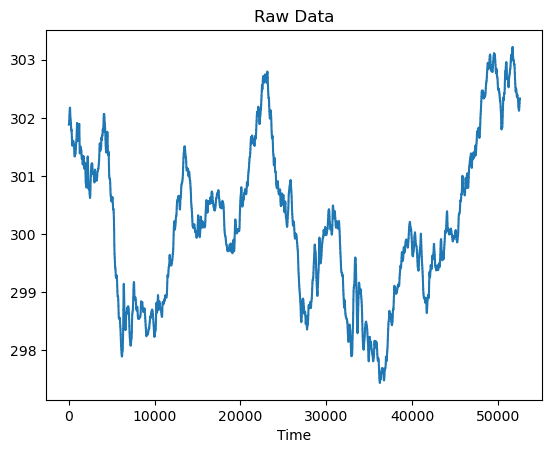

In [3]:
# Convert datetimes to number of hours since 1990-01-01 00:00:00
# This must be done in order to use the time for the x axis
time_num_raw = cftime.date2num(temp.time, 'hours since 1990-01-01 00:00:00')


# Plot
plt.plot(time_num_raw, temp.data)
plt.title('Raw Data')
plt.xlabel("Time");

## Calculate daily and monthly climate averages using `climatology_average`


Next, we use `geocat.comp.climatologies.climatology_average` to calculate averages across all years in a given dataset.

Note that while daily and monthly climatology averages are demonstrated here, you could also use the frequency keyword argments `hour` or `season` to calculate hourly or seasonal climatology averages.

Let's start with the daily climatology average. The following plot shows output of the raw data being aggregated using the `climatology_average` function with the `freq` argument set to 'day'. 

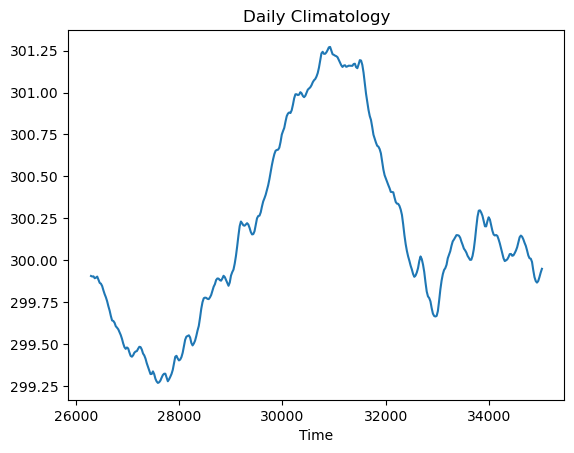

In [4]:
# Compute
daily = climatology_average(temp, freq='day')
time_num_day = cftime.date2num(daily.time, 'hours since 1990-01-01 00:00:00')


# Plot
plt.plot(time_num_day, daily.data)
plt.title('Daily Climatology')
plt.xlabel("Time");

Next we'll compute the monthly climatology averages by using `climatology_average` with the `freq` argument set to `month`.

The data is now grouped by month, which yeilds a smoother curve over the daily-averaged climatology.

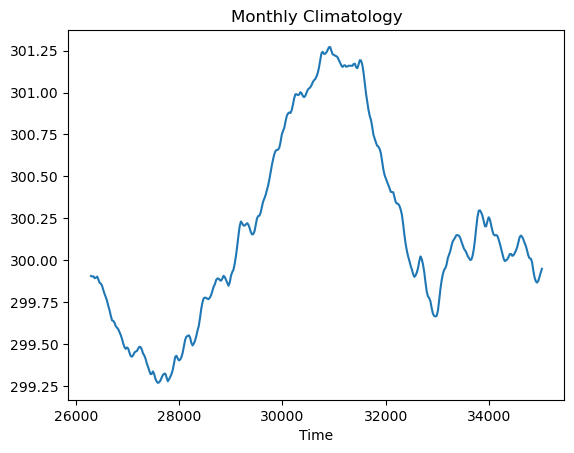

In [5]:
# Compute
monthly = climatology_average(temp, freq='month')
time_num_month = cftime.date2num(monthly.time,
                                 'hours since 1990-01-01 00:00:00')

# Plot
plt.plot(time_num_day, daily.data)
plt.title('Monthly Climatology')
plt.xlabel("Time");